# CAHW 3: NASA CMR and GIBS

**CMR** is Common Metadata Repository, one stop shopping for metadata on NASA remote sensing data sources. 
**GIBS** is the Global Image Browser System, one stop shopping for imagery. 
But *caveat emptor* these systems are not fully understood (by me) and may have limitations and constraints. 
We must proceed with caution!


## The Main Takeaway

NASA puts a lot of energy into collecting remote sensing data (as does NOAA and other agencies). Good! Now it seems fitting
to ask 'What NASA data over the ocean coincides with the cabled array?' That's what this notebook tries to get
started. 


#### Links

* [CMR](https://earthdata.nasa.gov/about/science-system-description/eosdis-components/common-metadata-repository)
* [GIBS](https://pypi.python.org/pypi/python-cmr/0.3.1)
* [Python-CMR](https://pypi.python.org/pypi/python-cmr/0.3.1)



## CMR

Let's see about using the CMR API; we postpone GIBS for the moment. 
The python-cmr package for CMR is intended to work with Python 2 or 3; so let's make sure that is installed for 
our use here and then figure out what it does from there. 

In [2]:
# Where to begin? Here: https://pypi.python.org/pypi/python-cmr/0.3.1
# pip install is necessary here (not conda install) and this may or may not persist. 
# If the code below throws an error: Un-comment and run this line:
# !pip install python-cmr

# There are two types of queries: Collections (large scale) and Granules (targeted, spatially I think)
from cmr import CollectionQuery, GranuleQuery
capi = CollectionQuery() 
gapi = GranuleQuery()

# You can run this and variants like capi.archive_center() to get a hint of how the CollectionQuery is put together
# dir(capi)

ImportError: No module named 'cmr'

In [2]:
# You wonder 'how can I name the DAACs???' Well this doesn't help much: 
#   dir(CollectionQuery().archive_center)
# Instead search on EOSDIS and get the listing of DAACs. You will eventually find https://earthdata.nasa.gov/about/daacs.
# Guess what: The DAAC names are *mostly* accurate (terms in parens). 
# Put them in a list and we make a bit more progress
 
collection_count = 0

# This is a guess that proves to be wrong! For example 'ORNL' returns 0!
daacs = ['ASF', 'ASDC', 'CDDIS', 'GHRC', 'GES DISC', 'LAADS', 'LP DAAC', \
                'NSIDC', 'ORNL', 'OB.DAAC', 'PO.DAAC', 'SEDAC']

# This is an updated list of DAAC search strings
# Now ORNL_DAAC returns 1287 forsooth
daacs = ['ASF', 'ASDC', 'CDDIS', 'GHRC', 'GES_DISC', 'LAADS', 'LP DAAC', \
                'NSIDC', 'ORNL_DAAC', 'OB.DAAC', 'PO.DAAC', 'SEDAC']

for daac in daacs: 
    collections = capi.archive_center(daac).keyword("*").get(20000)
    print (daac, 'returns', len(collections), 'collections')
    collection_count += len(collections)

print('\nA total of', collection_count,'collections.')

ASF returns 3 collections
ASDC returns 193 collections
CDDIS returns 33 collections
GHRC returns 3 collections
GES_DISC returns 0 collections
LAADS returns 2 collections
LP DAAC returns 320 collections
NSIDC returns 393 collections
ORNL_DAAC returns 1300 collections
OB.DAAC returns 159 collections
PO.DAAC returns 756 collections
SEDAC returns 222 collections

A total of 3384 collections.


In [3]:
# What are they named, these collections? 
# Let's try ASF...
collections = capi.archive_center('ASF').keyword("*").get(20000)
for c in collections: print(c['short_name'])
print('\n')
# Let's try physical oceanography
collections = capi.archive_center('PO.DAAC').keyword("*").get(7)
for c in collections: print(c['short_name'])

ALOS_PALSAR_SCENE_L1.1
ALOS_PALSAR_SCENE_L1.5
ALOS_PALSAR_SCENE_L1.0


ABOM-L4HRfnd-AUS-RAMSSA_09km
ABOM-L4LRfnd-GLOB-GAMSSA_28km
ALT_TIDE_GAUGE_L4_OST_SLA_US_WEST_COAST
ALT_TIDE_GAUGE_L4_OST_SLA_US_WEST_COAST_DAILY
AVHRR_OI-NCEI-L4-GLOB-v2.0
CMC0.1deg-CMC-L4-GLOB-v3.0
CMC0.2deg-CMC-L4-GLOB-v2.0


In [4]:
# Let's skip the DAAC name and just search on keywords
collections = capi.keyword("*").get(30000)
# for c in collections: print(c['short_name'])
# This returns 756 named collections:
print(len(collections))

756


In [5]:
# ok let's get excited: Perhaps with the wildcard keyword we can assemble the proper DAAC names...
daaclist = []
for c in collections:
    # This gets at originating orgs, not DAACs: if 'organizations' in c:
    # if 'archive_center' in c: from 20000 asks we get 1132 responses from GSFC to HELSINKI... 
    if 'data_center' in c:
        if c['data_center'] not in daaclist: 
            daaclist.append(c['data_center'])

print(len(daaclist))
print(daaclist)

# This block of code gets rid of redundancies from above 
# daacs_redux = []
# for org in daaclist:
#     if org not in daacs_redux: daacs_redux.append(org)
# 
# print(len(daacs_redux)) 
# The above line produces 2022 when we ask for 30000 collections (29998 have 'organizations' in the dict)
#                         1139 when we ask for 20000 collections (1999)

# this from the EOSDIS DAAC page is my initial guess of proper DAAC names
# daacs = ['ASF', 'ASDC', 'CDDIS', 'GHRC', 'GES DISC', 'LAADS', 'LP DAAC', \
#                'NSIDC', 'ORNL', 'OB.DAAC', 'PO.DAAC', 'SEDAC']

1
['PODAAC']


In [6]:
# So now I think 'hey tides! that sounds good!'
# I search on 'ALT_TIDE_GAUGE_L4_OST_SLA_US_WEST_COAST' and found out that podaac is at JPL. Go figure. 
#   https://podaac.jpl.nasa.gov/dataset/ALT_TIDE_GAUGE_L4_OST_SLA_US_WEST_COAST
# How do I get some data to make a plot? It seems to be gridded.
for c in collections: 
    if 'ALT_TIDE_GAUGE_L4_OST_SLA_US_WEST_COAST_DAILY' in c['short_name']:
        #print(c['links'], c['organizations'][0])
        print(c['organizations'][0])

# From this I get a large blurp of JSON metadata including an ftp site: 
# ftp://podaac-ftp.jpl.nasa.gov/allData/coastal_alt/preview/L4/OSU_COAS/daily
# So maybe the next thing I do is an 'ls -al' at that site to see what is available

PO.DAAC


### Looking into a retrieved data file

From the physical oceanography DAAC, mean sea level along the western UW coast in the directory /data/cmr.



In [ ]:
# Ok now it is time to get a data file
# The process to arrive at the curl/wget commands below in this cell was to manually format the JSON into readable format.
# That is the next cell below, raw text. This gives dictionary terms including ['links']. I did not automate this step however. 
# Rather I just looked at the URL and found the data files; and so copied the filename for the 1998 data.
# Noticing: On the server they are about 7 MB and here on pangeo they inflate to 19MB but retain the .gz extension.
# That is another time-wasting gotcha: They are *not* zipped and must simply be renamed fubar.nc
# 
# !curl https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_1998_v1.nc.gz -o ./msla1998.nc
# !curl https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_1999_v1.nc.gz -o ./msla1999.nc
# !curl https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_2000_v1.nc.gz -o ./msla2000.nc
# !curl https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_2001_v1.nc.gz -o ./msla2001.nc
# !curl https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_2002_v1.nc.gz -o ./msla2002.nc
# !curl https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_2003_v1.nc.gz -o ./msla2003.nc
# !curl https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_2004_v1.nc.gz -o ./msla2004.nc
# !curl https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_2005_v1.nc.gz -o ./msla2005.nc
# !curl https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_2006_v1.nc.gz -o ./msla2006.nc
# !curl https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_2007_v1.nc.gz -o ./msla2007.nc
!curl https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_2008_v1.nc.gz -o ./msla2008.nc
!curl https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_2009_v1.nc.gz -o ./msla2009.nc
!curl https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_2010_v1.nc.gz -o ./msla2010.nc
# !curl https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_2011_v1.nc.gz -o ./curla2011.nc
# !curl https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_2012_v1.nc.gz -o ./curla2012.nc
# !curl https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_2013_v1.nc.gz -o ./curla2013.nc
# !curl https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_2014_v1.nc.gz -o ./curla2014.nc
# !wget https://podaac-opendap.jpl.nasa.gov/opendap/allData/coastal_alt/preview/L4/OSU_COAS/daily/osu_cioss_daily_msla_geovel_1998_v1.nc.gz 
!ls -al

## Intermezzo: Pushing data to the cloud

Suppose from the above we have identified a Mean Surface Level Anomaly data file for 2010, seen locally
as `./msla2010.nc`. We want to keep this available in an AWS S3 bucket with open (public) read access so 
that anyone can grab it, for example using boto. The next cell pushes this file into the cloud. However
if will fail to run because I'm not putting the credentials file in place. The credentials give me permission
to write to that S3 bucket. 

In [3]:
# get our boto tools handy
import boto
import boto.s3
import sys
from boto.s3.key import Key

# Read connection credentials from a file
authfile=open('~/creds/s3auth.txt','r')
line=authfile.readline().rstrip()    # please note rstrip() removes any trailing \n whitespace
authfile.close()
AWS_ACCESS_KEY_ID,AWS_SECRET_ACCESS_KEY = line.split(',')

# connect and establish a bucket object that we use for everything that follows
connection = boto.connect_s3(AWS_ACCESS_KEY_ID, AWS_SECRET_ACCESS_KEY)
bucket_name = 'himatdata'
bucket = connection.get_bucket(bucket_name)


# point to the data file that we want to copy
data_dir = '~/cahw2018_tutorials/rob/'
datafile = data_dir + "msla2010.nc"
print('Uploading %s to Amazon S3 bucket %s' % (datafile, bucket_name))

# This is a cute little .... progress bar thingy
def percent_cb(complete, total):
    sys.stdout.write('.')
    sys.stdout.flush()

# The Key is a pointer to an S3 object. 
#   It has a '.key' which is the fullpath/filename of that object.
#   It is capable of executing the bytes-transfer file copy. (The bucket connection object does not do this.)
k = Key(bucket)
k.key = 'cmr/msla2010.nc'   # notice I am adding a subdirectory to the object path, 'cmr'
k.set_contents_from_filename(datafile, cb=percent_cb, num_cb=10)

# Let's look for our file in the S3 bucket now that it is copied over
print('\n')
for key in bucket.list():
    object_name = str(key.name.encode('utf-8'))
    if 'msla' in object_name: print(object_name)

# Suppose we also accidentally made a copy of our object in the root of s3 and we want to delete it...
#   This code will delete it and re-list all *msla* objects in s3 to verify it is gone; but the one 
#   we want is still there. 
# k.key = 'msla1998.nc'
# bucket.delete_key(k)
# print('\n')
# for key in bucket.list():
#     object_name = str(key.name.encode('utf-8'))
#     if 'msla' in object_name: print(object_name)

ImportError: No module named 'boto'

## Examining our MSLA data file

We used CMR to identify and pull a .nc file of mean sea level anomaly off the western coast of the US. 
This 20MB file is mean sea level anomaly file is gridded and also contains geostrophic currents.
The data are for 1998 on a daily average basis. How do we know this? Well we start using Python 
tools to peer under the hood so to speak. 

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import netCDF4
import xarray as xr

ImportError: No module named 'matplotlib'

In [8]:
# We will attach an xarray object called 'm' to the data file; this is the key action
data_dir = './'
msla_file = data_dir + 'msla2010.nc'

# m = xr.open_mfdataset(msla_file, decode_cf=False)
m = xr.open_mfdataset(msla_file)

# 'm' is an xarray dataset. By placing m on a line by itself we trigger its 'spill my guts' method, behold...
m   

<xarray.Dataset>
Dimensions:                                           (latitude: 54, longitude: 84, time: 365)
Coordinates:
  * latitude                                          (latitude) float32 35.25 ...
  * longitude                                         (longitude) float32 227.75 ...
  * time                                              (time) datetime64[ns] 2010-01-01T12:00:00 ...
Data variables:
    sea_surface_height_above_sea_level                (longitude, latitude, time) float32 dask.array<shape=(84, 54, 365), chunksize=(84, 54, 365)>
    surface_geostrophic_northward_sea_water_velocity  (longitude, latitude, time) float32 dask.array<shape=(84, 54, 365), chunksize=(84, 54, 365)>
    surface_geostrophic_eastward_sea_water_velocity   (longitude, latitude, time) float32 dask.array<shape=(84, 54, 365), chunksize=(84, 54, 365)>
Attributes:
    title:                   Daily sea-level anomaly and geostrophic current ...
    author:                  Craig Risien (crisien@coas.o

In [9]:
# Let's look at a couple data values
print('anomaly height')
print(m['sea_surface_height_above_sea_level'][0:2,4:6,1:3].values) 
print('\n')
print('velocity-north')
print(m['surface_geostrophic_northward_sea_water_velocity'][0:2,4:6,1:3].values) 
print('\n')
print('velocity-east')
print(m['surface_geostrophic_eastward_sea_water_velocity'][0:2,4:6,1:3].values) 
print('\n')
# and while we are here -- on our way to a 2D plot (lat/lon) for a given time using .sel(time):
# Let's get it to cough up some time values
print('datetimes')
print (m['time'].values[10:15])
# print ('    ')
# print (m['time'].values)

# This is a terrible, kludgy idea; don't do it
# custom_dts=m['time'].values[0:364]
# print(custom_dts[219])

anomaly height
[[[0.03340588 0.03349598]
  [0.03897965 0.03835297]]

 [[0.04943392 0.04994243]
  [0.05482852 0.05459835]]]


velocity-north
[[[0.08106255 0.08317871]
  [0.0799384  0.0819383 ]]

 [[0.09092661 0.09336243]
  [0.07910994 0.08191773]]]


velocity-east
[[[-0.01832534 -0.01603438]
  [-0.02965801 -0.02750573]]

 [[-0.03384605 -0.03139121]
  [-0.01489401 -0.01236816]]]


datetimes
['2010-01-11T12:00:00.000000000' '2010-01-12T12:00:00.000000000'
 '2010-01-13T12:00:00.000000000' '2010-01-14T12:00:00.000000000'
 '2010-01-15T12:00:00.000000000']


In [10]:
print(len(m.time))

365


In [13]:
# These imports give us control sliders that we use for selecting depth slices from the dataset
#   (a more ambitious soul might go for a JSAnim movie)
from ipywidgets import *
from traitlets import dlink

import datetime as dt
import pandas

In [ ]:
figure_object_list = []

def plotMSLA(date_value): 
    # does not use year, month, day
    # the_date = dt.datetime(year, month, day, 12)
    # print (the_date)
    msla=m['sea_surface_height_above_sea_level'].sel(time=date_value)
    # msla=m['sea_surface_height_above_sea_level'].sel(time='1998-01-15T12:00:54.996336640')
    
    # set us up to record this figure in the list of figures
    thisFigure, ax = plt.subplots(1,figsize=(16, 10))

    # The following works by using a dt from the Dataset (see above)
    # msla=m['sea_surface_height_above_sea_level'].sel(time='1998-01-15T12:00:54.996336640')
    # msla=m['sea_surface_height_above_sea_level'].sel(time=10237.5)
    # msla will now be a DataArray derived from the Dataset; you can... print(msla)
    msla.plot(ax=ax, x='longitude', y='latitude', cmap=plt.cm.bwr, vmin=-.15,vmax=.15)
    # it would be pleasant to rescale the longitude to [227.75,240.] (and to use west longitude for that matter)
    # Some fossil code for labeling the chart (makes sense in concert with a chooser widget)
    msg1 = '   Mean sea-level anomaly' 
    msg2 = '(daily average) on ' + str(date_value).split('T')[0]
    plt.text(238, 46, msg1, fontsize = '20')
    plt.text(238, 45, msg2, fontsize = '20')
    figure_object_list.append(thisFigure)
    plt.close(thisFigure)
    
# def plot_that_msla(date_index):
#     plotMSLA(date_index)

# This is the interactive slider
# interact(plot_that_msla, date_index=widgets.IntSlider(min=0,max=364,step=1,value=0, continuous_update=False))

for v in m.time.values:
    plotMSLA(v)

In [ ]:
print(len(figure_object_list))
print(figure_object_list[3])

In [ ]:
import animation_tools

In [ ]:
def make_image(fig, **kwargs):
    """
    Take a matplotlib figure *fig* and convert it to an image *im* that 
    can be viewed with imshow.
    """

    import io
    png = io.BytesIO()
    fig.savefig(png,format='png', **kwargs)
    png.seek(0)
    im = plt.imread(png)
    return im

In [ ]:
def make_images(figs, **kwargs):
    """
    Take a list of matplotlib figures *figs* and convert to list of images.
    """

    images = []
    for fig in figs:
        im = make_image(fig, **kwargs)
        images.append(im)
    return images

In [ ]:
# These imports give us control sliders that we use for selecting depth slices from the dataset
#   (a more ambitious soul might go for a JSAnim movie)
# Might be necessary to install JSAnimation:
#   conda install -y -c conda-forge jsanimation
# import animation_tools
images = make_images(figure_object_list, dpi=150)
# animation_tools.JSAnimate_images(images, figsize=(16,12))

from matplotlib import animation

fig = plt.figure(figsize=(16,12), dpi=None)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')  # so there's not a second set of axes

im = plt.imshow(images[0])

def init():
    im.set_data(images[0])
    return im,

def animate(i):
    im.set_data(images[i])
    return im,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(images), interval=200, blit=True)

plt.show()
anim.save('mymovie.mp4',fps=15)

# def init():
#     im.set_data(figure_object_list[0])
#     return im,

# def animate(i):
#     im.set_data(figure_object_list[i])
#     return im,

# from matplotlib import animation 
# # anim = animation.FuncAnimation(figure_object_list, \
# #                                animate, \
# #                                init_func=init, \
#                                frames=len(figure_object_list), \
#                                interval=200, \
#                                blit=True)

### Vector field render

Since we are very interested in water sloshing around let's take a moment to learn about plotting a vector field.
Our msla1998.nc file has both northward and eastward surface water velocities so we're set for data. 
(BTW 'geostrophic' means that pressure gradients and coriolus forces are in play.)


First I'll insert a block of code taken from [this page](https://matplotlib.org/examples/pylab_examples/quiver_demo.html).

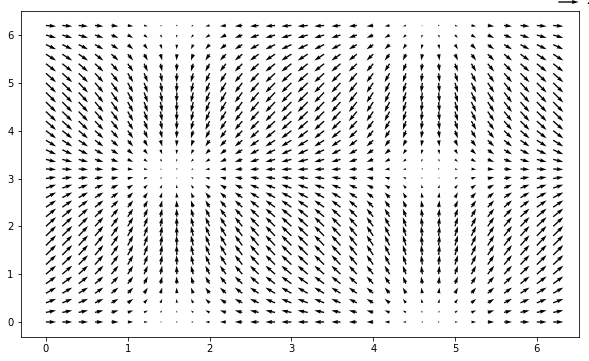

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U, V = np.cos(X), np.sin(Y)
plt.figure(figsize=(10,6))
Q = plt.quiver(X, Y, U, V, units='width')
qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E', coordinates='figure')
plt.show()

Next let us try and adopt this code to our data.

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

def ShowCurrents(date_index):
    custom_dts=m['time'].values[:]
    # X, Y = np.meshgrid(m['longitude'], m['latitude'])
    X, Y = np.meshgrid(m['latitude'], m['longitude'])
    U = m['surface_geostrophic_northward_sea_water_velocity'].sel(time=custom_dts[date_index])
    V = m['surface_geostrophic_eastward_sea_water_velocity'].sel(time=custom_dts[date_index])
    plt.figure(figsize=(10,10))
    plt.title('Geostrophic surface currents')
    thisFigure = plt.quiver(Y, X, V, U, units='width')
    # qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E', coordinates='figure')
    # msg1 = '   Geostrophic surface currents' 
    # msg2 = '(daily average) on ' + str(m['time'][date_index]).split('T')[0]
    # plt.text(238, 46, msg1, fontsize = '20')
    # plt.text(238, 45, msg2, fontsize = '20')
    # plt.show()
    
# This is the interactive slider
interact(ShowCurrents, date_index=widgets.IntSlider(min=0,max=364,step=1,value=0, continuous_update=True))

interactive(children=(IntSlider(value=0, description='date_index', max=364), Output()), _dom_classes=('widget-interact',))

<function __main__.ShowCurrents>

AttributeError: Unknown property x

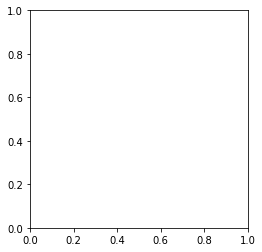

In [36]:
# This used to work...
# U.plot(x='longitude',y='latitude')
plt.imshow(U,x='longitude',y='latitude')
# Uxr = xr.DataArray(U)
# Uxr.plot(x='longitude', y='latitude')
# Uxr.plot()

In [18]:
V.plot(x='longitude', y='latitude')

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [ ]:

x=m.coords['longitude'].values
y=m.coords['latitude'].values

print(len(x))
print(len(y))
print 54*84



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
import datetime as dt
import pandas

# geostrophic surface currents
GSC_figobjlist = []

def plotGSC(date_value): 

    # from ShowCurrents(date_index)
    custom_dts=m['time'].values[:]
    X, Y = np.meshgrid(m['latitude'], m['longitude'])
    U = m['surface_geostrophic_northward_sea_water_velocity'].sel(time=date_value)
    V = m['surface_geostrophic_eastward_sea_water_velocity'].sel(time=date_value)
    plt.figure(figsize=(10,10))
    plt.title('Geostrophic surface currents')
    thisFigure = plt.quiver(Y, X, V, U, units='width')
    # I did not follow the msla recipe of thisFigure, ax = plt.subplots(etc)
    # msg1 = '   Geostrophic surface currents' 
    # msg2 = '(daily average) on ' + str(date_value).split('T')[0]
    # plt.text(238, 46, msg1, fontsize = '20')
    # plt.text(238, 45, msg2, fontsize = '20')
    GSC_figobjlist.append(thisFigure)
    # plt.close(thisFigure)
    
    # original
    # msla=m['sea_surface_height_above_sea_level'].sel(time=date_value)
    # thisFigure, ax = plt.subplots(1,figsize=(16, 10))
    # msla.plot(ax=ax, x='longitude', y='latitude', cmap=plt.cm.bwr, vmin=-.15,vmax=.15)
   
# for v in m.time.values: 
    # plotGSC(v)


In [ ]:
import animation_tools
images = animation_tools.make_images(GSC_figobjlist, dpi=150)
# animation_tools.JSAnimate_images(images, figsize=(16,12))

from matplotlib import animation

fig = plt.figure(figsize=(16,12), dpi=None)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')  # so there's not a second set of axes

im = plt.imshow(images[0])

def init():
    im.set_data(images[0])
    return im,

def animate(i):
    im.set_data(images[i])
    return im,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(images), interval=200, blit=True)

plt.show()
anim.save('GSCmovie.mp4',fps=15)

### This section works with the granule api

It does not do much at the moment except hang...

kilroy go back to the python-cmr GitHub and look at the example; refine as needed or complain.


In [ ]:
granules = gapi.short_name("AST_L1T").point(-112.73, 42.5).get(3)

In [ ]:
for granule in granules: print(granule["title"])

In [ ]:
# search for granules matching a specific product/short_name
gapi.short_name("AST_L1T")

# search for granules matching a specific version
gapi.version("006")

# search for granules at a specific longitude and latitude
gapi.point(-112.73, 42.5)

# search for granules in an area bound by a box (lower left lon/lat, upper right lon/lat)
gapi.bounding_box(-112.70, 42.5, -110, 44.5)

# search for granules in a polygon
gapi.polygon([(-100, 40), (-90, 40), (-95, 38), (-100, 40)])

# search for granules in a line
gapi.line([(-100, 40), (-90, 40), (-95, 38)])

import datetime

# search for granules in an open or closed date range
gapi.temporal("2016-10-10T01:02:00Z", "2016-10-12T00:00:30Z")
gapi.temporal("2016-10-10T01:02:00Z", None)
gapi.temporal(datetime.datetime(2016, 10, 10, 1, 2, 0), datetime.datetime.now())
# api.temporal([datetime.datetime("2016-10-10T01:02:00Z"), datetime.datetime.now()])
# api.temporal([datetime.datetime(2016, 10, 10), datetime.datetime.now()])

# only include granules available for download
# api.downloadable()

# only include granules that are unavailable for download
# api.online_only()

In [ ]:
# search for a granule by its unique ID
gapi.granule_ur("SC:AST_L1T.003:2150315169")

# search for granules from a specific orbit
gapi.orbit_number(5000)

# filter by the day/night flag
gapi.day_night_flag("day")

# filter by cloud cover percentage range
gapi.cloud_cover(25, 75)

# filter by specific instrument or platform
gapi.instrument("MODIS")
gapi.platform("Terra")